# Time Series Data Exploration & Visualization Assignment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [ ]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


In [ ]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [ ]:
df['SalesDate']=pd.to_datetime(df['SalesDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


### Create a line chart showing the number of total units sold per day in February.

In [ ]:
def linechart(df, x, length=8, width=15, title=""):
    if df.index.name != x:
        df = df.set_index(x)

    ax = df.plot(figsize=(width,length), cmap="Set2")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=4)
    
    plt.title(title + "\n", fontsize=20)

In [ ]:
df['date'] = df['SalesDate'].dt.date

In [ ]:
feb.groupby('date').sum()[['Quantity']].reset_index()

,date,Quantity
0,2018-02-01,672020
1,2018-02-02,675124
2,2018-02-03,671666
3,2018-02-04,673154
4,2018-02-05,670170
5,2018-02-06,670404
6,2018-02-07,669339
7,2018-02-08,675238
8,2018-02-09,672896
9,2018-02-10,672100


In [ ]:
feb = df[(df['SalesDate'] >= '2018-02-01') & (df['SalesDate'] < '2018-03-01')]
daily_units = feb.groupby('date').agg({'Quantity': 'sum'}).reset_index()
daily_units.head()

,date,Quantity
0,2018-02-01,672020
1,2018-02-02,675124
2,2018-02-03,671666
3,2018-02-04,673154
4,2018-02-05,670170


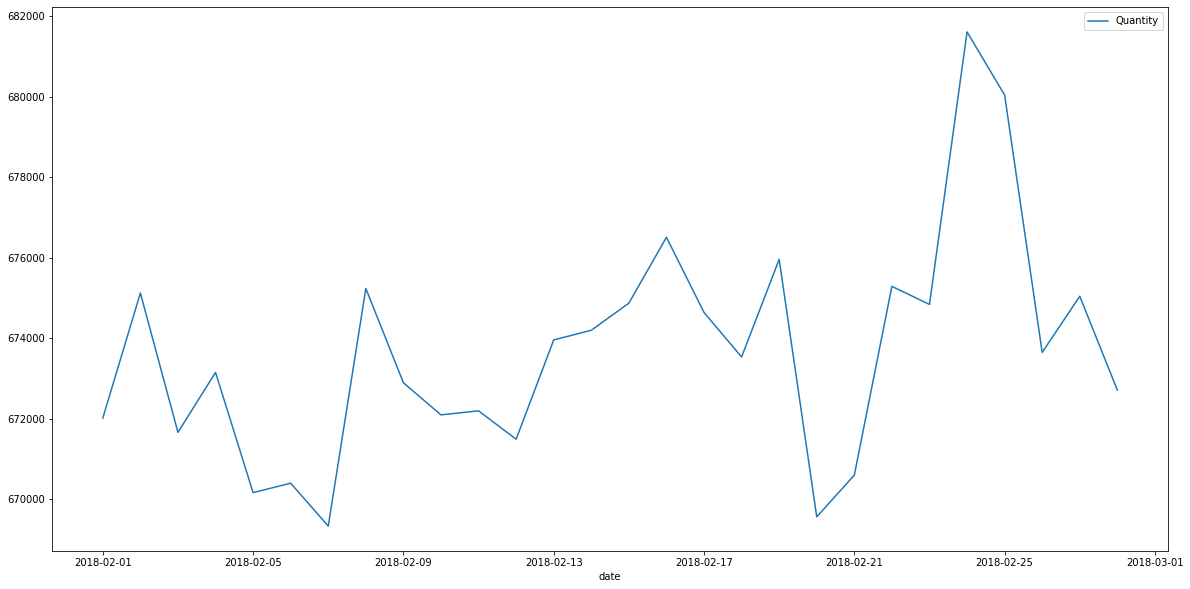

In [ ]:
daily_units.set_index('date').plot(figsize=(20,10))

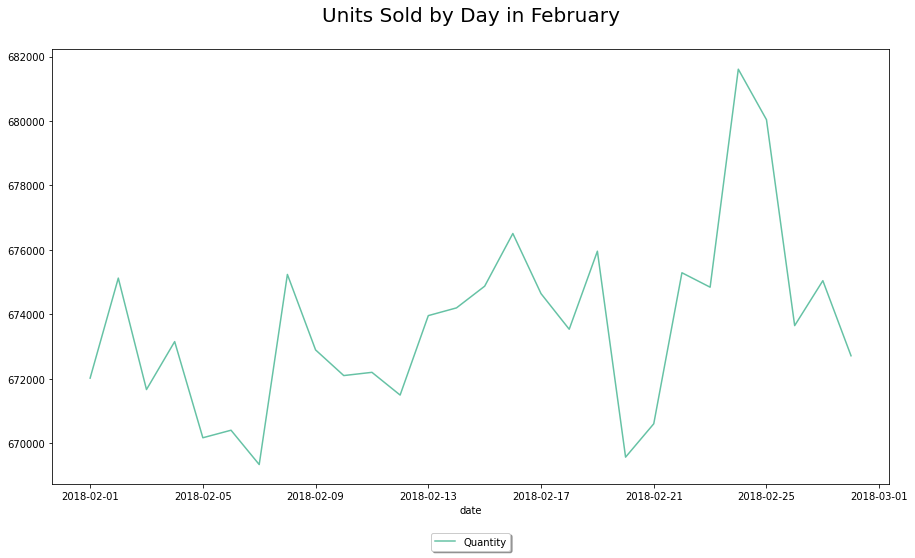

In [ ]:
linechart(daily_units, 'date', title="Units Sold by Day in February")

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [ ]:
march = df[(df['SalesDate'] >= '2018-03-01') & (df['SalesDate'] < '2018-04-01')]
products = march[march['ProductID'].isin([124, 344, 407, 449])]
daily_units = products.pivot_table(index='date', columns='ProductID', values='Quantity', aggfunc='sum')
daily_units.head()

ProductID,124,344,407,449
date,,,,
2018-03-01,1617,1413,1696,1343
2018-03-02,1737,1374,1733,1292
2018-03-03,1309,1695,1486,1432
2018-03-04,1308,1675,1323,1466
2018-03-05,1645,1182,1540,1467


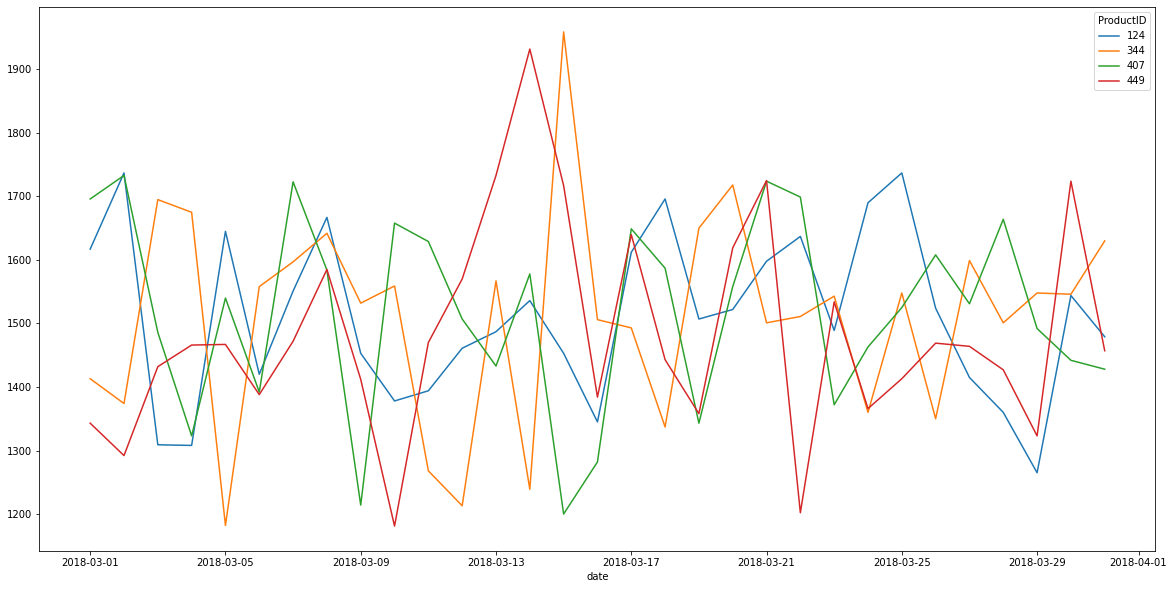

In [ ]:
daily_units.plot(figsize=(20,10))

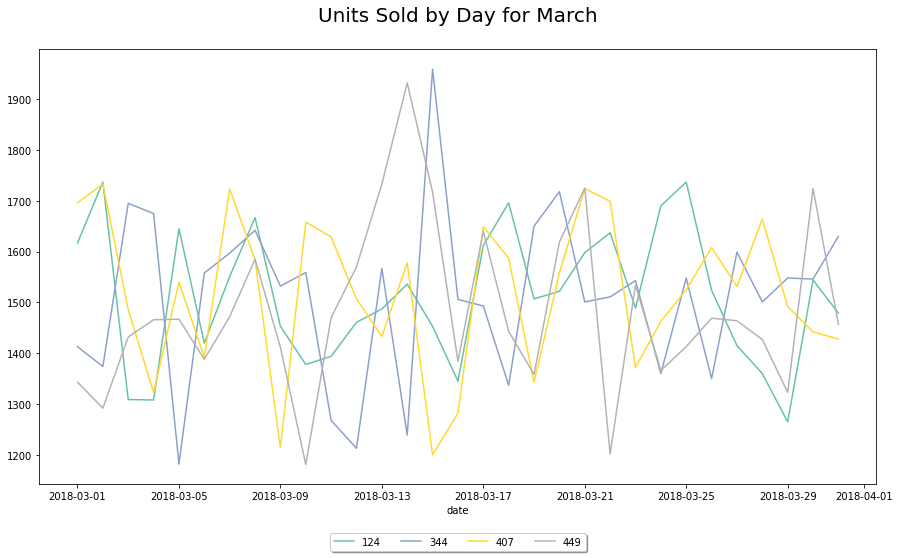

In [ ]:
linechart(daily_units, 'date', title='Units Sold by Day for March')

### Create a bar chart that shows units sold by each hour of the day.

In [ ]:
def barchart(df, x, y, groups=None, length=8, width=14, title=""):
    plt.figure(figsize=(width,length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + "\n", fontsize=16)

In [ ]:
df['hour'] = df['SalesDate'].dt.hour
hour_sales = df.groupby('hour').agg({'Quantity': 'sum'}).reset_index()
hour_sales.head()

,hour,Quantity
0,0.0,3627044
1,1.0,3622628
2,2.0,3630784
3,3.0,3616872
4,4.0,3620283


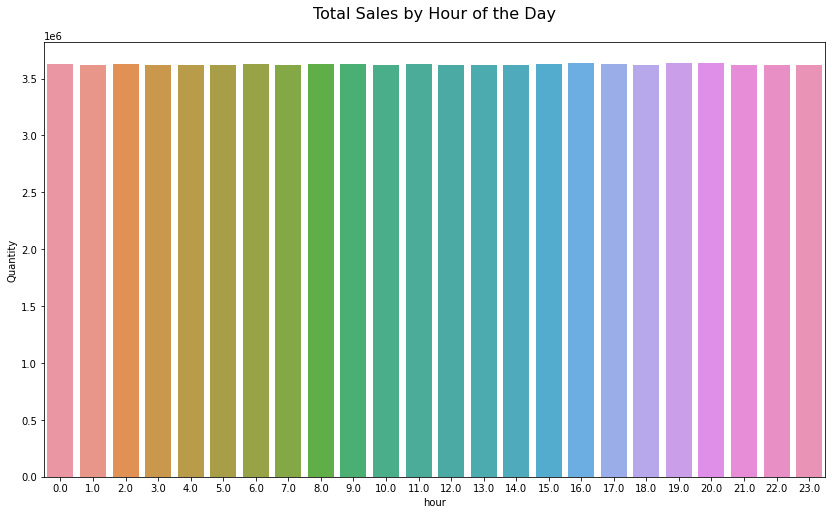

In [ ]:
barchart(hour_sales, 'hour', 'Quantity', title='Total Sales by Hour of the Day')

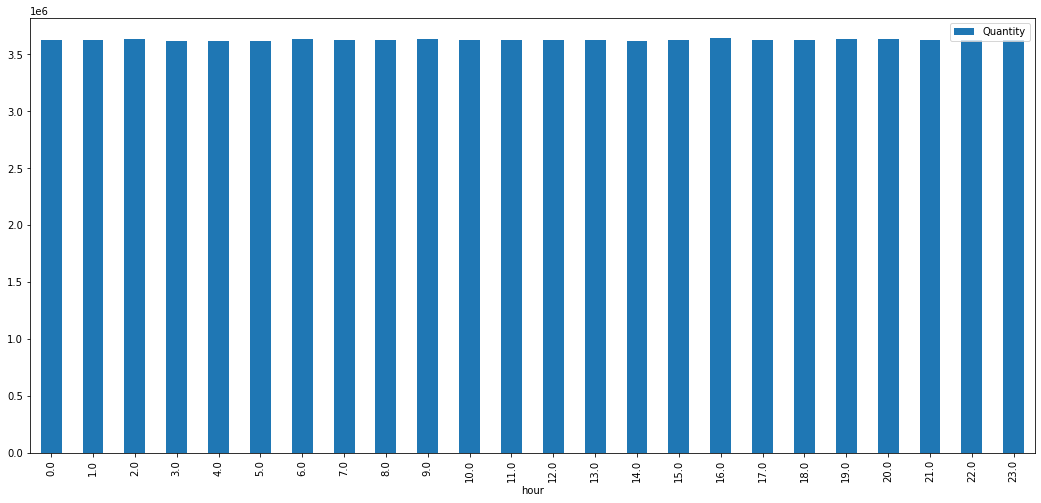

In [ ]:
hour_sales.set_index('hour').plot(kind='bar', figsize=(18,8))

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [ ]:
def heatmap(df, length=8, width=18, title=""):
    plt.figure(figsize=(width,length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', 
                     cmap='Reds', linewidths=.01)
    
    plt.title(title + "\n", fontsize=16)

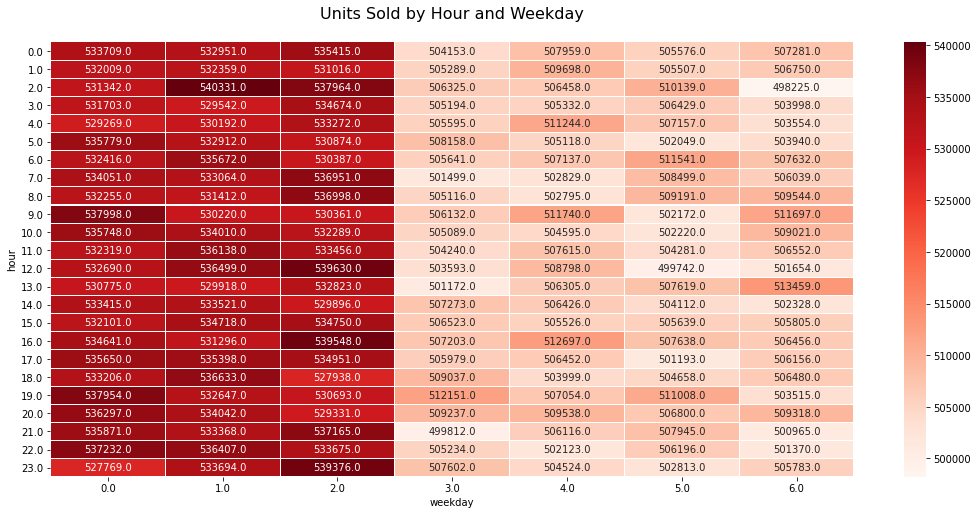

In [ ]:
df['weekday'] = df['SalesDate'].dt.weekday
hour_weekday = df.pivot_table(index='hour', columns='weekday', values='Quantity', aggfunc='sum')
heatmap(hour_weekday, title="Units Sold by Hour and Weekday")

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [ ]:
def correlation_plot(df, title=""):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title + "\n", fontsize=20)

In [ ]:
# df['ProductID'].sample(20)
prod_ids = df["ProductID"].unique()
prod_20 = np.random.choice(prod_ids, size=20, replace=False) 

prod_20

array([ 84, 328, 179, 269,  75, 143, 285, 410, 126, 261, 315,  22,  18,
       104, 127, 397, 116,  47, 102, 365])

In [ ]:
product_df = df[df['ProductID'].isin(prod_20)]
product_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,date,hour,weekday
11,12,17,28353,285,8,NaN,"0,00",2018-02-07 00:50:06.000,BLQPUVH22XKER90WAW7P,2018-02-07,0.0,2.0
33,34,4,17875,116,5,NaN,"0,00",2018-01-24 08:21:21.770,DA1UH9Q7X5K0V47TOFDV,2018-01-24,8.0,2.0
84,85,7,64880,328,17,NaN,"0,00",2018-04-18 19:42:16.190,8XUSTJM66AWY91WZ9UP6,2018-04-18,19.0,2.0
95,96,9,22604,22,6,NaN,"0,00",2018-01-11 17:43:32.740,FCY2D2WR4YTXPGLYT0AE,2018-01-11,17.0,3.0
130,131,4,76636,84,20,NaN,"0,00",2018-01-07 06:28:42.540,RIAFIKCNJRBT5RT4U4M1,2018-01-07,6.0,6.0


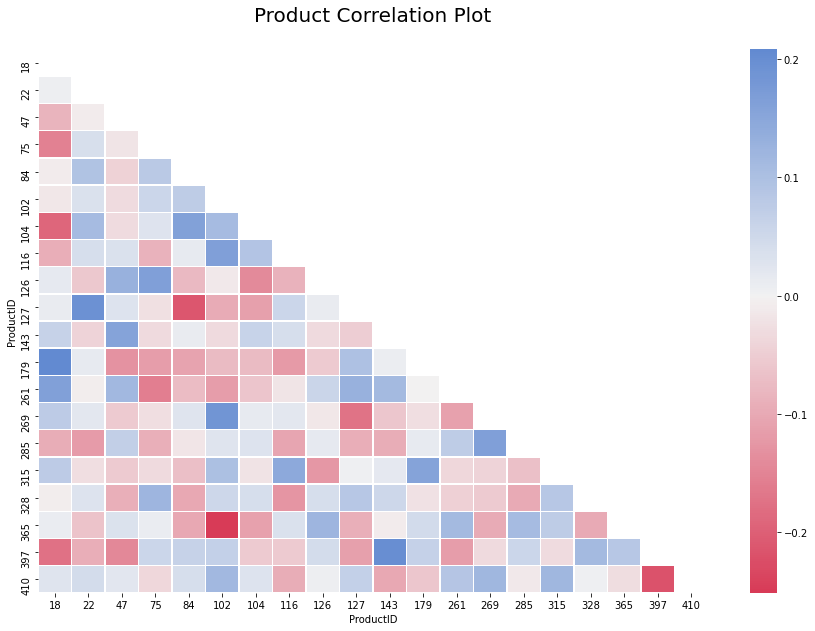

In [ ]:
product_daily_sales = product_df.pivot_table(index='date', columns='ProductID', values='Quantity', aggfunc='sum')
correlation_plot(product_daily_sales, title="Product Correlation Plot")

### Create a histogram showing the distribution of daily units sold.

In [ ]:
def histogram(df, field=None, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.distplot(df[field])
    plt.title(title + "\n", fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


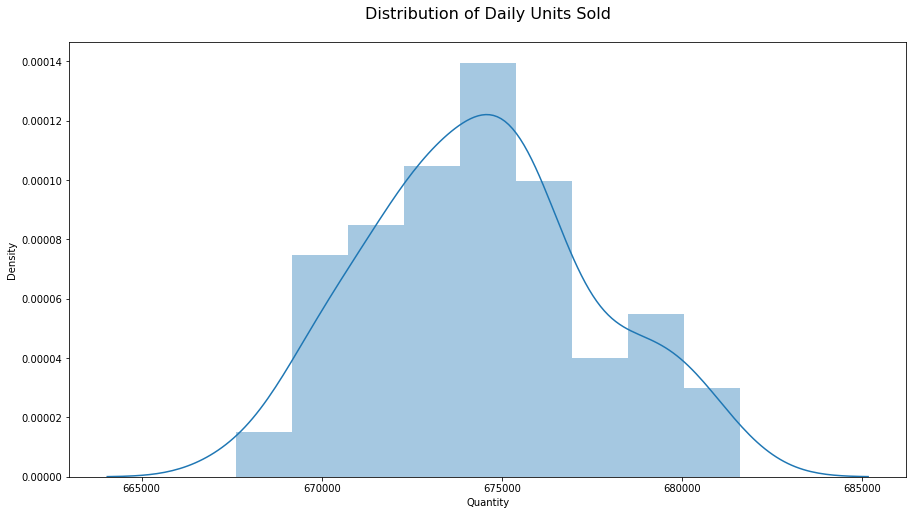

In [ ]:
daily_units = df.groupby('date').agg({'Quantity': 'sum'}).reset_index()
histogram(daily_units, 'Quantity', title='Distribution of Daily Units Sold')

### Create a violin plot showing the distribution of daily units sold by month.

In [ ]:
def violin(df, x, y, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.violinplot(x=x, y=y, data=df)
    plt.title(title + "\n", fontsize=20)


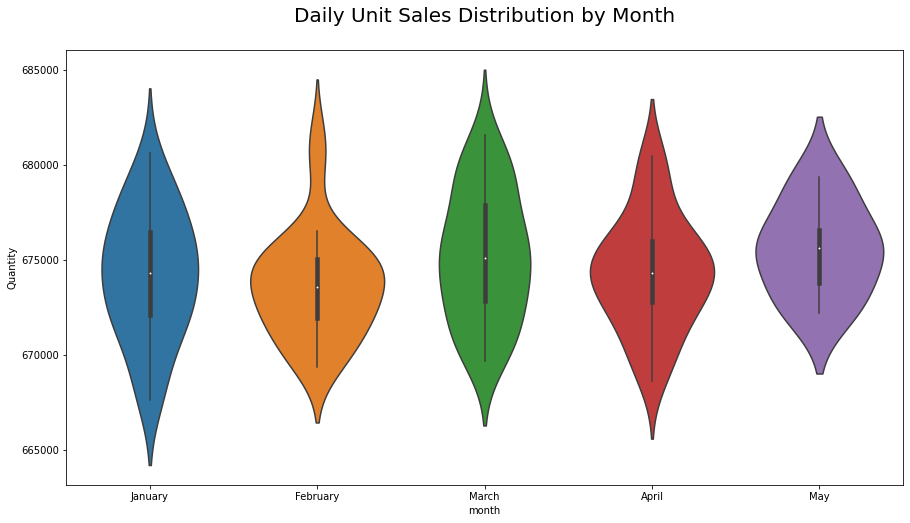

In [ ]:
df['month'] = df['SalesDate'].dt.month_name()
date_month_units = df.groupby(['date', 'month']).agg({'Quantity': 'sum'}).reset_index()
violin(date_month_units, 'month', 'Quantity', title='Daily Unit Sales Distribution by Month')